In [13]:
import mmcv
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [14]:

palette = np.array([[0, 0, 0], [0, 0, 255]])

#outlier가 지워진 train images
file_list = os.listdir('/home/jovyan/work/datasets/satellite3/train_img_erase_outlier')    

# List of image paths
img_paths = []
for i in file_list:
    file_name = os.path.join('/home/jovyan/work/datasets/satellite/annotations/all_train_val/', i)
    img_paths.append(file_name)

# Shuffle the image paths
# np.random.shuffle(img_paths)

# Split the image paths into train and val sets
# train_paths = img_paths[:int(len(img_paths)*0.8)]
# val_paths = img_paths[int(len(img_paths)*0.8):]

# Calculate pixel 1 ratio for each image in train set

pixel_ratios = []

def f(img_paths):
    ret = []
    for img_path in img_paths:
        # Load the mask image
        mask = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Calculate the pixel composition ratio
        total_pixels = 1024 * 1024    
        pixel_1_count = np.count_nonzero(mask == 1)
        pixel_1_ratio = (pixel_1_count / total_pixels) * 100

        ret.append(int(pixel_1_ratio))
    return ret
pixel_ratios = f(img_paths)
print(pixel_ratios[:10])

[7, 18, 12, 9, 3, 2, 5, 13, 4, 1]


In [22]:
import pandas as pd
df = pd.DataFrame({'name' : img_paths,
                   'ratio' : pixel_ratios})
df

,name,ratio
0,/home/jovyan/work/datasets/satellite/annotatio...,7
1,/home/jovyan/work/datasets/satellite/annotatio...,18
2,/home/jovyan/work/datasets/satellite/annotatio...,12
3,/home/jovyan/work/datasets/satellite/annotatio...,9
4,/home/jovyan/work/datasets/satellite/annotatio...,3
...,...,...
6997,/home/jovyan/work/datasets/satellite/annotatio...,1
6998,/home/jovyan/work/datasets/satellite/annotatio...,3
6999,/home/jovyan/work/datasets/satellite/annotatio...,12
7000,/home/jovyan/work/datasets/satellite/annotatio...,1


In [23]:
df['ratio'].value_counts()

ratio
1     1330
2      873
4      661
3      659
5      593
6      575
7      452
8      411
9      370
10     265
11     212
12     164
13     114
14      94
15      67
16      36
19      23
18      22
17      16
21      13
22       9
20       9
24       6
23       5
26       5
29       4
25       3
33       2
31       2
34       1
35       1
30       1
28       1
41       1
47       1
40       1
Name: count, dtype: int64

In [24]:
df.loc[df['ratio'] > 24, 'ratio'] = 25
df['ratio'].value_counts()

ratio
1     1330
2      873
4      661
3      659
5      593
6      575
7      452
8      411
9      370
10     265
11     212
12     164
13     114
14      94
15      67
16      36
25      23
19      23
18      22
17      16
21      13
22       9
20       9
24       6
23       5
Name: count, dtype: int64

In [6]:
from collections import Counter
import sklearn
def count(img_paths):
    y = f(img_paths)
    category_counts = Counter(y)
    plt.bar(category_counts.keys(), category_counts.values())

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid = train_test_split(df, stratify=df['ratio'], test_size=0.15)

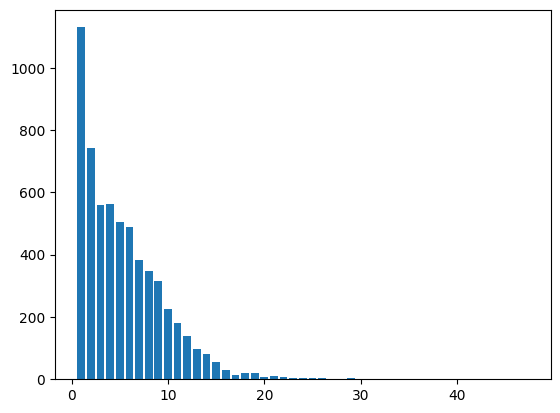

In [14]:
count(X_train['name'])

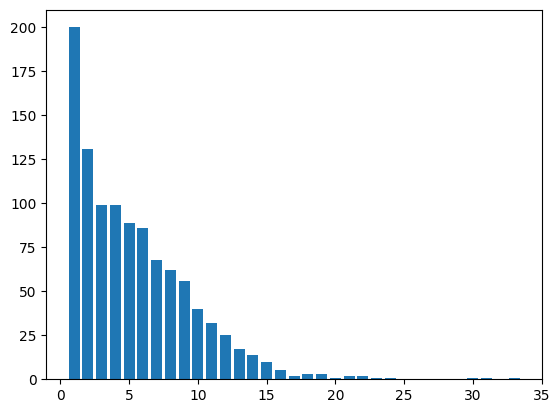

In [15]:
count(X_valid['name'])

In [12]:
!pwd

/home/jovyan/work/datasets/satellite3


In [19]:
# Create directories for split images
train_dir = '/home/jovyan/work/datasets/satellite3/anno_train_img'
val_dir = '/home/jovyan/work/datasets/satellite3/anno_valid_img'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Save train images and count the number of images
train_image_count = 0
for img_path in X_train['name']:
    image = cv2.imread(img_path)
    save_path = os.path.join(train_dir, os.path.basename(img_path))
    cv2.imwrite(save_path, image)
    train_image_count += 1

# Save val images and count the number of images
val_image_count = 0
for img_path in X_valid['name']:
    image = cv2.imread(img_path)
    save_path = os.path.join(val_dir, os.path.basename(img_path))
    cv2.imwrite(save_path, image)
    val_image_count += 1

print(f"Train image count: {train_image_count}")
print(f"Val image count: {val_image_count}")


Train image count: 5951
Val image count: 1051


In [20]:
import os
import shutil

# Source directories
image_source_dir = '/home/jovyan/work/datasets/satellite/images/all_train_val'
anno_train_dir = '/home/jovyan/work/datasets/satellite3/anno_train_img'
anno_val_dir = '/home/jovyan/work/datasets/satellite3/anno_valid_img'

# Destination directories
ori_train_dir = '/home/jovyan/work/datasets/satellite3/train_img'
ori_val_dir = '/home/jovyan/work/datasets/satellite3/valid_img'
os.makedirs(ori_train_dir, exist_ok=True)
os.makedirs(ori_val_dir, exist_ok=True)

# Get list of annotated image file names
anno_train_files = [f for f in os.listdir(anno_train_dir) if os.path.isfile(os.path.join(anno_train_dir, f))]
anno_val_files = [f for f in os.listdir(anno_val_dir) if os.path.isfile(os.path.join(anno_val_dir, f))]

# Copy corresponding original images to destination directories
for file_name in anno_train_files:
    image_file = os.path.join(image_source_dir, file_name.replace('.png', '.png'))
    destination_file = os.path.join(ori_train_dir, file_name)
    shutil.copyfile(image_file, destination_file)

for file_name in anno_val_files:
    image_file = os.path.join(image_source_dir, file_name.replace('.png', '.png'))
    destination_file = os.path.join(ori_val_dir, file_name)
    shutil.copyfile(image_file, destination_file)
print("Original images copied to the split directories.")


Original images copied to the split directories.


In [20]:
df

,name,ratio
0,/home/jovyan/work/datasets/satellite/annotatio...,7
1,/home/jovyan/work/datasets/satellite/annotatio...,18
2,/home/jovyan/work/datasets/satellite/annotatio...,12
3,/home/jovyan/work/datasets/satellite/annotatio...,9
4,/home/jovyan/work/datasets/satellite/annotatio...,3
...,...,...
6997,/home/jovyan/work/datasets/satellite/annotatio...,1
6998,/home/jovyan/work/datasets/satellite/annotatio...,3
6999,/home/jovyan/work/datasets/satellite/annotatio...,12
7000,/home/jovyan/work/datasets/satellite/annotatio...,1


In [18]:
import os
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import shutil

In [19]:
k = 4
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [25]:
# 폴더 생성 함수
def create_dir_if_not_exists(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

# K-Fold 데이터 분할 및 Train, Validation 폴더에 이미지 복사
for fold_idx, (train_index, val_index) in enumerate(skf.split(df, df['ratio'])):
    train_df, val_df = df.iloc[train_index], df.iloc[val_index]
    
    # 폴더 생성
    train_dir = os.path.join(f'/home/jovyan/work/datasets/satellite3/kfold/fold_{fold_idx + 1}', 'train')
    val_dir = os.path.join(f'/home/jovyan/work/datasets/satellite3/kfold/fold_{fold_idx + 1}', 'valid')
    create_dir_if_not_exists(train_dir)
    create_dir_if_not_exists(val_dir)
    
    # Train 데이터 복사
    for _, row in train_df.iterrows():
        src_path = row['name']
        file_name = os.path.basename(src_path)
        src_path = os.path.join('/home/jovyan/work/datasets/satellite3/train_img_erase_outlier', file_name)
        dst_path = os.path.join(train_dir, file_name)
        shutil.copy(src_path, dst_path)
    
    # Validation 데이터 복사
    for _, row in val_df.iterrows():
        src_path = row['name']
        file_name = os.path.basename(src_path)
        src_path = os.path.join('/home/jovyan/work/datasets/satellite3/train_img_erase_outlier', file_name)
        dst_path = os.path.join(val_dir, file_name)
        shutil.copy(src_path, dst_path)